In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import functools
import nltk
!pip install xgboost
import xgboost as xgb
import re
import seaborn as sn
from difflib import get_close_matches
# Visualization
#!pip install plotly
#import plotly.express as px

#!pip install emoji
from emoji import UNICODE_EMOJI

# Sklearn
    
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, KFold# for splitting data into train and test samples
from sklearn.svm import SVC, LinearSVC # for Support Vector Classification baseline model
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score # for model evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

contents = []
with open("rumour-annotation-2_annotations.json", 'rb') as j:
     contents.append(json.loads(j.read()))
contents2 = []
with open("rumour-annotation-3_annotations.json", 'rb') as j:
     contents2.append(json.loads(j.read()))
        
contents3 = []
with open("rumour-annotation_annotations.json", 'rb') as j:
     contents3.append(json.loads(j.read()))

contents4 = []
with open("rumour-annotation-4_annotations.json", 'rb') as j:
     contents4.append(json.loads(j.read()))


Text(0, 0.5, 'frequency')

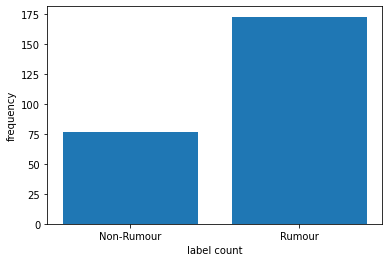

In [2]:
annotations = contents[0]["examples"]

classnames = []
for i in range(0,len(annotations)):
    classnames.append(annotations[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

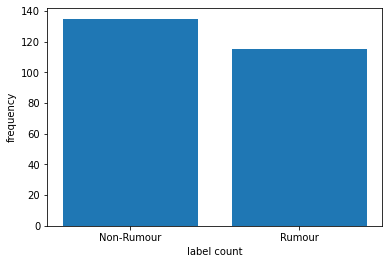

In [3]:
annotations2 = contents2[0]["examples"]

classnames2 = []
for i in range(0,len(annotations2)):
    classnames2.append(annotations2[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames2, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

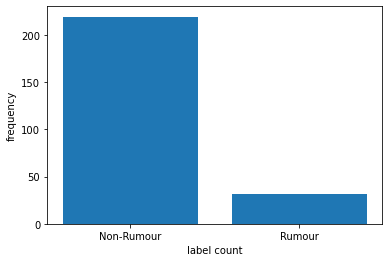

In [4]:
annotations3 = contents3[0]["examples"]

classnames3 = []
for i in range(0,len(annotations3)):
    classnames3.append(annotations3[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames3, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

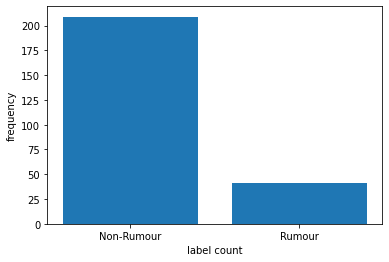

In [5]:
annotations4 = contents4[0]["examples"]

classnames4 = ["Rumour"]
for i in range(1,len(annotations4)):
    classnames4.append(annotations4[i]["classifications"][0]["classname"])

unique, counts = np.unique(classnames4, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("label count")
plt.ylabel("frequency")

In [6]:
# Using readline()
file = open('#jinek.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data1 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#jinek")
        temp.append(-1)
        temp.append("n.a.")
        data1.append(temp)
len(data1)

175780

In [7]:
# Using readline()
file1 = open('#vleestaks.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file1.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data2 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#vleestaks")
        temp.append(-1)
        temp.append("n.a.")
        data2.append(temp)
len(data2)

10542

In [8]:
# Using readline()
file = open('#inflatie.txt', 'r')
count = 0
tweets = []

while True:
    count += 1
 
    # Get next line from file
    line = file.readline()
 
    # if line is empty
    # end of file is reached
    if not line:
        break
    tweets.append(json.loads(line))#,encoding="utf-8"))
    
data3 = []
for i in range(len(tweets)):
    for j in range(len(tweets[i]["data"])):
        temp = []
        temp.append(tweets[i]["data"][j])
        user = [k for k in tweets[0]["includes"]["users"] 
                if k["id"] == tweets[i]["data"][j]["author_id"]]
        temp.append(user)
        temp.append("#inflatie")
        temp.append(-1)
        temp.append("n.a.")
        data3.append(temp)
len(data3)

39278

In [9]:
data = data1 + data2 + data3

In [10]:
sample1 = [annotations[i]["content"] for i in range(len(annotations))]
sample2 = [annotations2[i]["content"] for i in range(len(annotations2))]
sample3 = [annotations3[i]["content"] for i in range(len(annotations3))]
sample4 = [annotations4[i]["content"] for i in range(len(annotations4))]

sample = [sample1 + sample2 + sample3 + sample4]
# sample = [re.sub(r"[^a-zA-Z]+", "", i) for i in sample]

annotations = annotations + annotations2 + annotations3 + annotations4


annotators = ["A", "B", "C", "D"]

In [11]:
#adding rumours 

#sample = [sample1, sample2, sample3, sample4]
# annotators = ["A", "B", "C", "D"]
texts = [data[i][0]["text"] for i in range(len(data))]
for i in range(len(texts)):
    for s in sample:
        if texts[i] in s:
            if annotations[s.index(texts[i])]["classifications"] != []:
                label = annotations[s.index(texts[i])]["classifications"][0]["classname"]
                data[i][4] = annotators[sample.index(s)]
                if label == "Rumour":
                    data[i][3] = 1
                elif label == "Non-Rumour":
                    data[i][3] = 0
            else:
                data[i][3] = 1

In [12]:
import time 
#text = data2[x][0]["text"]

def get_features(data):

    features = []

    for x in range(0,len(data)):
        temp = []
        if data[x][1] != []:
            followers_count = data[x][1][0]["public_metrics"]["followers_count"]
            temp.append(followers_count + np.random.normal(0,0.5))
        else:
            temp.append(0 + np.random.normal(0,0.5))

        tweetcount = -1 
        if data[x][1] != []:        
            tweetcount = data[x][1][0]["public_metrics"]["tweet_count"]
            temp.append(tweetcount + np.random.normal(0,0.5))
        else:
            temp.append(0 + np.random.normal(0,0.5))

        qmarks = "?" in data[x][0]["text"]
        temp.append(int(qmarks) + np.random.normal(0,0.5))

        if data[x][1] != []:
            verified = data[x][1][0]["verified"]
            temp.append(int(verified) + np.random.normal(0,0.5))    
        else:
            temp.append(0 + np.random.normal(0,0.5))

        accountlife = time.mktime(time.localtime()) - time.mktime(time.strptime(data[x][0]["created_at"], "%Y-%m-%dT%H:%M:%S.000Z"))
        temp.append(accountlife + np.random.normal(0,0.5))

        if data[x][1] != []:    
            ratio = (data[x][1][0]["public_metrics"]["followers_count"]+1)/(data[x][1][0]["public_metrics"]["following_count"]+2)
            temp.append(ratio + np.random.normal(0,0.5))
        else:
            temp.append(0 + np.random.normal(0,0.5))

        emark = "!" in data[x][0]["text"]
        temp.append(int(emark) + np.random.normal(0,0.5))

        capitalletters = sum(1 for c in data[x][0]["text"] if c.isupper())/sum(1 for c in data[x][0])
        temp.append(capitalletters + np.random.normal(0,0.5))

        retweet_count = data[x][0]["public_metrics"]["retweet_count"]
        temp.append(retweet_count + np.random.normal(0,0.5))

        hashtags = "#" in data[x][0]["text"]
        temp.append(int(hashtags) + np.random.normal(0,0.5))

        if data[x][1] != []:
            following = data[x][1][0]["public_metrics"]["following_count"]
            temp.append(following + np.random.normal(0,0.5))
        else:
            temp.append(0 + np.random.normal(0,0.5))

        text_length = len(data[x][0]["text"])
        temp.append(text_length + np.random.normal(0,0.5))

        if data[x][1] != []:    
            listed_count = data[x][1][0]["public_metrics"]["listed_count"]
            temp.append(listed_count + np.random.normal(0,0.5))
        else:
            temp.append(0 + np.random.normal(0,0.5))

        emoticons = True in [s in UNICODE_EMOJI['en'] for s in data[x][0]["text"]]
        temp.append(int(emoticons) + np.random.normal(0,0.5))

        #reply_count = data[x][0]["public_metrics"]["reply_count"]
        #temp.append(reply_count)

        #quote_count = data[x][0]["public_metrics"]["quote_count"]
        #temp.append(quote_count)

        like_count = data[x][0]["public_metrics"]["like_count"]
        temp.append(like_count + np.random.normal(0,0.5))

        if data[x][1] != []:
            timeafterposting = time.mktime(time.strptime(data[x][1][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z")) - time.mktime(time.strptime(data[x][0]["created_at"],"%Y-%m-%dT%H:%M:%S.000Z"))
            temp.append(timeafterposting + np.random.normal(0,0.5))
        else:
            temp.append(0 + np.random.normal(0,0.5))

        #pos_tags = nltk.pos_tag(nltk.word_tokenize(data[x][0]["text"]))
        #temp.append(pos_tags)

        activity = accountlife/tweetcount
        temp.append(activity + np.random.normal(0,0.5))

        #if data[x][1] != []:
        #    has_url = "profile_image_url" in data[x][1][0]
        #    temp.append(int(has_url))
        #else:
        #    temp.append(None)

        #fpp = True in [i in data[x][0]["text"].lower() for i in ["me", "my", "i", "mine"]]
        #temp.append(int(fpp))

        #nsfw = data[x][0]["possibly_sensitive"] 
        #temp.append(int(nsfw))
        #temp.append(data[x][2])
        #temp.append(sentence_vectors[x])
        temp.append(texts[x])

        temp.append(data[x][3])
        features.append(temp)
        

    return features   

In [15]:
import pandas as pd

columns = ["followers_count",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
          "like_count",
          "time_after_posting",
          "activity",
           "text",
          "label"]


In [16]:
features1 = get_features(data1)
features2 = get_features(data2)
features3 = get_features(data3)

df1 = pd.DataFrame(data=features1, index=None, columns=columns) #jinek
df2 = pd.DataFrame(data=features2, index=None, columns=columns) #vleestaks
df3 = pd.DataFrame(data=features3, index=None, columns=columns) #inflatie

In [18]:
#upsample 

rows = np.random.choice(df1[df1["label"] == 1].index, size=len(df1[df1["label"] == 0]), replace=True)
df_jinek = df1.loc[rows[0]].to_frame().transpose()
for r in rows[1:]:
    df_jinek = pd.concat([df_jinek, df1.loc[r].to_frame().transpose()])
df_jinek = df_jinek.sample(frac=1).reset_index()

In [19]:
df_jinek = pd.concat([df_jinek,df1[df1["label"] != 1]]).sample(frac=1).reset_index().drop(["level_0", "index"], axis=1)

In [20]:
np.unique(df_jinek["label"],return_counts=True)

(array([-1, 0, 1], dtype=object), array([175234,    399,    399]))

In [21]:
rows = np.random.choice(df2[df2["label"] == 1].index, size=len(df2[df2["label"] == 0]), replace=True)
df_vt = df2.loc[rows[0]].to_frame().transpose()
for r in rows[1:]:
    df_vt = pd.concat([df_vt, df2.loc[r].to_frame().transpose()])
df_vt = df_vt.sample(frac=1).reset_index()
df_vt = pd.concat([df_vt,df2[df2["label"] != 1]]).sample(frac=1).reset_index().drop(["level_0", "index"], axis=1)

In [22]:
np.unique(df_vt["label"],return_counts=True)

(array([-1, 0, 1], dtype=object), array([8838, 1644, 1644]))

In [23]:
rows = np.random.choice(df3[df3["label"] == 0].index, size=len(df3[df3["label"] == 1]), replace=True)
df_inf = df3.loc[rows[0]].to_frame().transpose()
for r in rows[1:]:
    df_inf = pd.concat([df_inf, df3.loc[r].to_frame().transpose()])
df_inf = df_inf.sample(frac=1).reset_index()
df_inf = pd.concat([df_inf,df3[df3["label"] != 0]]).sample(frac=1).reset_index().drop(["level_0", "index"], axis=1)

In [24]:
np.unique(df_inf["label"],return_counts=True)

(array([-1, 0, 1], dtype=object), array([37421,  1414,  1414]))

In [59]:
df = pd.concat([df_jinek, df_vt, df_inf]).sample(frac=1).reset_index().drop("index", axis=1)
df 

,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,following,text length,listed_count,emoticons,like_count,time_after_posting,activity,text,label
0,-0.055542,-0.136958,-0.777811,-0.752331,12553976.954756,-0.010159,-0.294578,1.917548,0.979216,1.433196,0.223464,229.272032,-0.184994,-0.35905,1.899684,-0.623952,-12553976.979854,@MedineSmatip2 #UkraineRussiaCrisis #RussiaUkr...,-1
1,0.142899,0.86176,0.166975,0.390692,9288859.157222,-0.215828,1.024436,0.253902,115.293811,1.05892,0.383394,140.005316,-0.814125,0.299936,-0.101448,0.417466,-9288858.530907,RT @EelcoHoecke: Zelfs Gijs Rademakers kan er ...,-1
2,0.206439,-0.050806,-0.213644,0.531782,24980516.627469,0.544444,0.762302,1.872506,1.542493,1.198233,0.219646,228.604827,0.217575,0.462258,0.884133,-0.346786,-24980515.649294,Nou iedereens QR-Code + alle gegevens zijn nu ...,-1
3,-0.243467,0.256327,-0.45667,0.54035,155294816.591769,0.483727,0.022358,0.199073,-0.137198,0.726056,0.181099,125.553984,-0.149116,-1.511557,0.762448,-0.573961,-155294816.32326,RT @HenriBoersma: Absurd dat ik #BBC of #CNN m...,-1
4,163.078498,16778.396046,-0.887324,-0.057062,20986266.251808,0.555887,0.172199,2.433806,-0.012076,0.518271,267.571579,277.557367,6.648349,0.374897,0.359609,-180627613.805367,1250.551931,Watch: Door-To-Door Covid Vaccine Census Caugh...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228402,-0.280259,0.3595,-0.255897,0.826165,11117705.47993,0.479385,-0.579722,6.687664,0.045764,2.129479,0.126395,275.305802,0.431935,0.340203,0.558401,-0.963756,-11117705.471207,RT @EelcoHoecke: Volgens #Timmermans wordt de ...,-1
228403,-0.112395,0.194175,-0.081542,0.430551,10695595.866745,0.257964,-0.187443,0.496544,2.156017,0.006239,1.244353,140.772341,-0.3904,0.230713,-0.785808,1.113146,-10695596.076905,RT @HansLandman: Sophie Hermans komt uit een d...,-1
228404,-0.522815,0.171673,-0.377964,-1.206737,41938309.495563,0.382704,1.689004,0.7906,208.175787,-0.684478,-0.709567,139.244637,-0.449451,0.009527,0.444643,-0.107319,-41938308.631962,RT @Jinek_RTL: De intense verkiezingsstrijd is...,-1
228405,-0.783533,-0.255219,-1.266768,-0.048537,22119267.545812,0.153825,-0.586364,0.286384,689.618289,0.712248,0.169302,139.028766,-0.35843,0.152589,-0.562152,-0.920077,-22119267.302114,RT @mariannezw: Hoe Buma gisteren bij #Jinek p...,-1


In [2]:
df = df.drop_duplicates(["text"]).drop(["text"],axis=1)

In [1]:
cols = df.select_dtypes(exclude=['float']).columns

df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [47]:
#ALL FEATURES ---------- SELF-TRAINING ------------------ XGBOOST 



df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = xgb.XGBClassifier(objective="binary:logistic")

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )



# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))


#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    #print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
#print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))
print(accuracy_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

[-1 0 1]
[-1 0 1]
[-1 0 1]
[-1 0 1]
[-1 0 1]


ValueError: Classification metrics can't handle a mix of unknown and binary targets

              precision    recall  f1-score   support

         0.0       0.63      0.10      0.17       119
       1e+00       0.37      0.90      0.53        70

    accuracy                           0.40       189
   macro avg       0.50      0.50      0.35       189
weighted avg       0.53      0.40      0.30       189



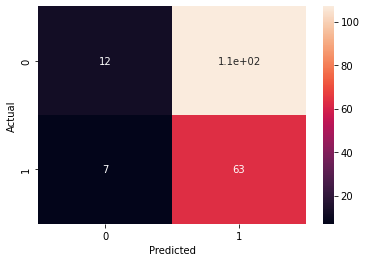

0.5004201680672269
0.3968253968253968


In [65]:
#ALL FEATURES ---------- SELF-TRAINING ------------------ NAIVE BAYES 
df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True)#.values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = GaussianNB()

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )


# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

    

#     if X_train.size > 0 & y_train.size > 0:

    self_training_model.fit(X_train,y_train)
    
    #print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))
print(accuracy_score(y_test, self_training_model.predict(X_test)))

Accuracy for the fold no. 1 on the test set: 0.011672723268362516
Accuracy for the fold no. 2 on the test set: 0.01198105935469662
Accuracy for the fold no. 3 on the test set: 0.012069421196370363
Accuracy for the fold no. 4 on the test set: 0.011783102810325081
Accuracy for the fold no. 5 on the test set: 0.014404017267201127
              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71       695
         1.0       0.78      0.34      0.47       688

    accuracy                           0.62      1383
   macro avg       0.68      0.62      0.59      1383
weighted avg       0.68      0.62      0.59      1383



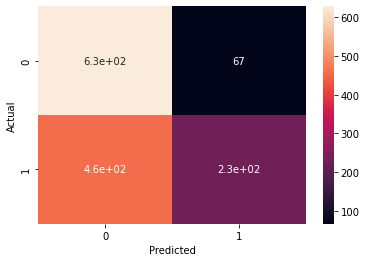

0.6196764681278233


In [33]:
#ALL FEATURES ---------- SELF-TRAINING ------------------ SVC 


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
                        probability=True, # Need to enable to be able to use predict_proba
                        C=1.0, # default = 1.0
                        max_iter = 10000,
                        gamma='scale', # default = 'scale',
                   )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=None,# default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
# clf_ST = self_training_model.fit(X_baseline, y_baseline)


# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))
    

#     if X_train.size > 0 & y_train.size > 0:
    model.fit(X_train,y_train)
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

Accuracy for the fold no. 1 on the test set: 0.9819168173598554
Accuracy for the fold no. 2 on the test set: 0.9719710669077758
Accuracy for the fold no. 3 on the test set: 0.9792043399638336
Accuracy for the fold no. 4 on the test set: 0.972875226039783
Accuracy for the fold no. 5 on the test set: 0.9719710669077758
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       677
         1.0       0.97      0.97      0.97       706

    accuracy                           0.97      1383
   macro avg       0.97      0.97      0.97      1383
weighted avg       0.97      0.97      0.97      1383



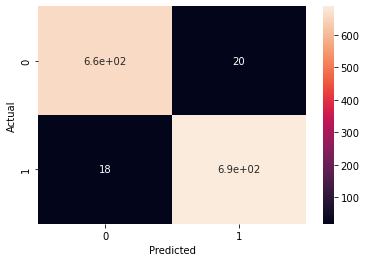

0.9724810759014315


In [25]:
#ALL FEATURES ---------- NO SELF-TRAINING ------------------ XGBoost

df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

# df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
# model = GaussianNB()
model = xgb.XGBClassifier(objective="binary:logistic")
#model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                        probability=True, # Need to enable to be able to use predict_proba
#                        C=1.0, # default = 1.0
#                        max_iter = 1000,
#                        gamma='scale', # default = 'scale',
#                   )
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = df_train.iloc[train_index][columns[:-1]].reset_index(drop=True)
    y_train = df_train.iloc[train_index][columns[-1]].reset_index(drop=True)
    X_val = df_train.iloc[test_index][columns[:-1]].reset_index(drop=True)#.reset_index(drop=True))
    y_val = df_train.iloc[test_index][columns[-1]].reset_index(drop=True)
    

#     if X_train.size > 0 & y_train.size > 0:
    model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, model.predict(X_test)))

/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 1 on the test set: 0.47920433996383366


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 2 on the test set: 0.49276672694394213


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 3 on the test set: 0.47468354430379744


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 4 on the test set: 0.4891500904159132
Accuracy for the fold no. 5 on the test set: 0.4240506329113924
              precision    recall  f1-score   support

         0.0       0.22      0.09      0.12       701
         1.0       0.42      0.69      0.52       682

    accuracy                           0.38      1383
   macro avg       0.32      0.39      0.32      1383
weighted avg       0.32      0.38      0.32      1383



/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


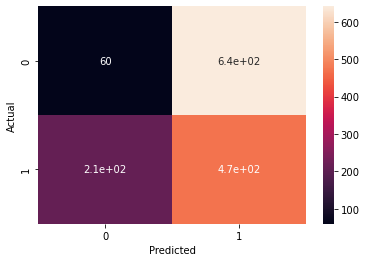

0.3873707857647852


In [28]:
#ALL FEATURES ---------- NO SELF-TRAINING ------------------ SVC

df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
# model = GaussianNB()
# model = xgb.XGBClassifier(objective="binary:logistic")
model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
                       probability=True, # Need to enable to be able to use predict_proba
                       C=1.0, # default = 1.0
                       max_iter = 100000,
                       gamma='scale', # default = 'scale',
                  )
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = df_train.iloc[train_index][columns[:-1]].reset_index(drop=True)
    y_train = df_train.iloc[train_index][columns[-1]].reset_index(drop=True)
    X_val = df_train.iloc[test_index][columns[:-1]].reset_index(drop=True)#.reset_index(drop=True))
    y_val = df_train.iloc[test_index][columns[-1]].reset_index(drop=True)
    

#     if X_train.size > 0 & y_train.size > 0:
    model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, model.predict(X_test)))

Accuracy for the fold no. 1 on the test set: 0.5
Accuracy for the fold no. 2 on the test set: 0.5650994575045208
Accuracy for the fold no. 3 on the test set: 0.488245931283906
Accuracy for the fold no. 4 on the test set: 0.5108499095840868
Accuracy for the fold no. 5 on the test set: 0.4837251356238698
              precision    recall  f1-score   support

         0.0       0.44      0.01      0.01       683
         1.0       0.51      0.99      0.67       700

    accuracy                           0.51      1383
   macro avg       0.48      0.50      0.34      1383
weighted avg       0.48      0.51      0.34      1383



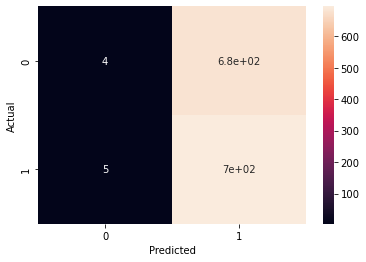

0.49935682911524787


In [27]:
#ALL FEATURES ---------- NO SELF-TRAINING ------------------ NAIVE BAYES

df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = GaussianNB()
# model = xgb.XGBClassifier(objective="binary:logistic")
#model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                        probability=True, # Need to enable to be able to use predict_proba
#                        C=1.0, # default = 1.0
#                        max_iter = 1000,
#                        gamma='scale', # default = 'scale',
#                   )
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = df_train.iloc[train_index][columns[:-1]].reset_index(drop=True)
    y_train = df_train.iloc[train_index][columns[-1]].reset_index(drop=True)
    X_val = df_train.iloc[test_index][columns[:-1]].reset_index(drop=True)#.reset_index(drop=True))
    y_val = df_train.iloc[test_index][columns[-1]].reset_index(drop=True)
    

#     if X_train.size > 0 & y_train.size > 0:
    model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, model.predict(X_test)))

Accuracy for the fold no. 1 on the test set: 0.023896046690893073
Accuracy for the fold no. 2 on the test set: 0.02363175861689241
Accuracy for the fold no. 3 on the test set: 0.023874548497929696
Accuracy for the fold no. 4 on the test set: 0.02378645053299269
Accuracy for the fold no. 5 on the test set: 0.023676328076821424
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       693
         1.0       0.98      0.97      0.97       690

    accuracy                           0.97      1383
   macro avg       0.97      0.97      0.97      1383
weighted avg       0.97      0.97      0.97      1383



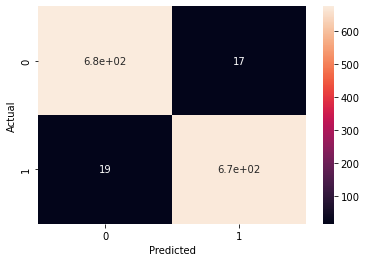

0.9739663717924587


In [30]:
#TWO FEATURES ---------- SELF-TRAINING ------------------ XGBOOST 
from sklearn.model_selection import KFold


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = xgb.XGBClassifier(objective="binary:logistic")

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )



# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 1 on the test set: 0.011804867305362846


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 2 on the test set: 0.009206034577689681


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 3 on the test set: 0.011959298740199102


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 4 on the test set: 0.011981323231433354


/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/nickvanderlinden/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy for the fold no. 5 on the test set: 0.008721698528763986
              precision    recall  f1-score   support

         0.0       0.26      0.12      0.17       696
         1.0       0.42      0.66      0.51       687

    accuracy                           0.39      1383
   macro avg       0.34      0.39      0.34      1383
weighted avg       0.34      0.39      0.34      1383



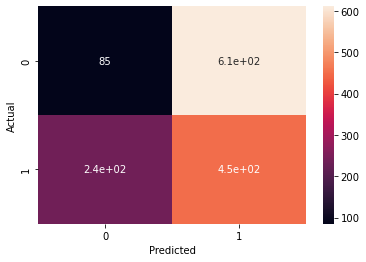

0.38857413542137226


In [31]:
#TWO FEATURES ---------- SELF-TRAINING ------------------ SVC
from sklearn.model_selection import KFold


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
# model = GaussianNB()
# model = xgb.XGBClassifier(objective="binary:logistic")
model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
                       probability=True, # Need to enable to be able to use predict_proba
                       C=1.0, # default = 1.0
                       max_iter = 1000,
                       gamma='scale', # default = 'scale',
                  )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )



# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

Accuracy for the fold no. 1 on the test set: 0.009294130602356569
Accuracy for the fold no. 2 on the test set: 0.01250963550269794
Accuracy for the fold no. 3 on the test set: 0.009844947581710863
Accuracy for the fold no. 4 on the test set: 0.012950400845740463
Accuracy for the fold no. 5 on the test set: 0.012686106950929433
              precision    recall  f1-score   support

         0.0       0.46      0.08      0.13       695
       1e+00       0.49      0.91      0.64       688

    accuracy                           0.49      1383
   macro avg       0.48      0.49      0.39      1383
weighted avg       0.48      0.49      0.38      1383



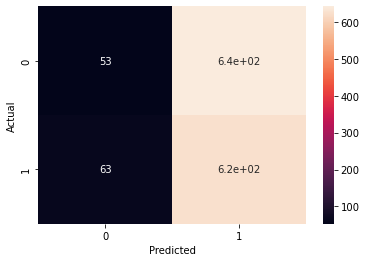

0.49234461268194746


In [32]:
#TWO FEATURES ---------- SELF-TRAINING ------------------ Naive Bayes
from sklearn.model_selection import KFold


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values

########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = GaussianNB()
# model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                        probability=True, # Need to enable to be able to use predict_proba
#                        C=1.0, # default = 1.0
#                        max_iter = 1000,
#                        gamma='scale', # default = 'scale',
#                   )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )



# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

In [33]:
features1 = get_features(data1)
features2 = get_features(data2)
features3 = get_features(data3)

Accuracy for the fold no. 225649 on the test set: 0.11902852560430748
Accuracy for the fold no. 225650 on the test set: 0.06862183526177111
Accuracy for the fold no. 225651 on the test set: 0.07102760911902853
              precision    recall  f1-score   support

         0.0       0.45      0.77      0.57       399
         1.0       0.23      0.07      0.10       399

    accuracy                           0.42       798
   macro avg       0.34      0.42      0.34       798
weighted avg       0.34      0.42      0.34       798



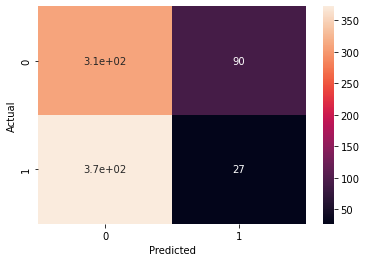

0.4210526315789474
Accuracy for the fold no. 225652 on the test set: 0.003911559907898022


KeyboardInterrupt: 

In [41]:
#ALL FEATURES -----------------SPLIT-------------------XGBoost
kf = KFold(n_splits=3, shuffle=False)

dfs = [df_jinek, df_vt, df_inf]
    
for train_index, test_index in kf.split(dfs):
    train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[columns[:-1]]# + dfs[train_index[1]][columns[:-1]]
    X_test = test[columns[:-1]]
    y_train = train["label"]
    y_test = test ['label']
        
    model = xgb.XGBClassifier(objective="binary:logistic")
#    model = GaussianNB()
#     model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                        probability=True, # Need to enable to be able to use predict_proba
#                        C=1.0, # default = 1.0
#                        max_iter = 1000,
#                        gamma='scale', # default = 'scale',
#                   )
    
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )

    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(X_train))

    for train_index, test_index in kf5.split(rn):
        X_train_cv = X_train.iloc[train_index]#.reset_index(drop=True))
        y_train_cv = y_train.iloc[train_index]#pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                     #        df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
        X_val = X_train.iloc[test_index]#pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                #           df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
        y_val = y_train.iloc[test_index]#pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                #           df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

    #     if X_train.size > 0 & y_train.size > 0:
        self_training_model.fit(X_train_cv,y_train_cv)

        print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
    #     else:
    #         print(X_train.size)
    #         print(y_train.size)
    #         print(X_test.size)
    #         print(y_test.size)
    #         print("----------")
        i += 1






    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, self_training_model.predict(X_test)))
    #confusion matrix
    cm = confusion_matrix(y_test, self_training_model.predict(X_test))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    #AUC
    #print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
    print(roc_auc_score(y_test, self_training_model.predict(X_test)))

    # from sklearn.model_selection import cross_val_score
    # scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

Accuracy for the fold no. 225614 on the test set: 0.04610978520286396
Accuracy for the fold no. 225615 on the test set: 0.04639618138424821
Accuracy for the fold no. 225616 on the test set: 0.045059665871121715
Accuracy for the fold no. 225617 on the test set: 0.04009546539379475
Accuracy for the fold no. 225618 on the test set: 0.03904907389726943
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       399
         1.0       0.50      1.00      0.67       399

    accuracy                           0.50       798
   macro avg       0.25      0.50      0.33       798
weighted avg       0.25      0.50      0.33       798



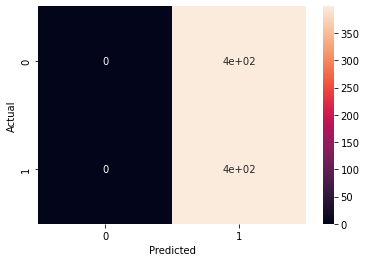

0.5
Accuracy for the fold no. 225619 on the test set: 0.0027279452561494357
Accuracy for the fold no. 225620 on the test set: 0.0020806362123173662
Accuracy for the fold no. 225621 on the test set: 0.002149990752727945
Accuracy for the fold no. 225622 on the test set: 0.0021962271130016647
Accuracy for the fold no. 225623 on the test set: 0.017546698723876455
              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86      1644
         1.0       0.98      0.68      0.80      1644

    accuracy                           0.83      3288
   macro avg       0.87      0.83      0.83      3288
weighted avg       0.87      0.83      0.83      3288



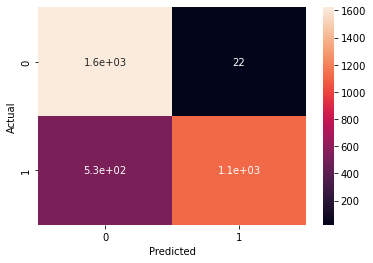

0.8333333333333333
Accuracy for the fold no. 225624 on the test set: 0.0026838860544217687
Accuracy for the fold no. 225625 on the test set: 0.0020461309523809525
Accuracy for the fold no. 225626 on the test set: 0.0024713666923547074
Accuracy for the fold no. 225627 on the test set: 0.001780446971911456
Accuracy for the fold no. 225628 on the test set: 0.016502351784433048
              precision    recall  f1-score   support

         0.0       0.70      0.30      0.42      1414
         1.0       0.56      0.87      0.68      1414

    accuracy                           0.59      2828
   macro avg       0.63      0.59      0.55      2828
weighted avg       0.63      0.59      0.55      2828



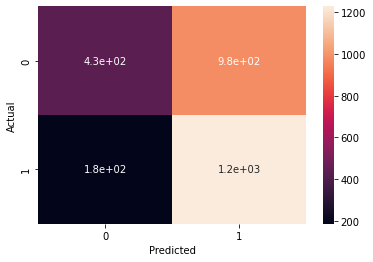

0.5869872701555869


In [36]:
#ALL FEATURES -----------------SPLIT-------------------SVC
kf = KFold(n_splits=3, shuffle=False)

dfs = [df_jinek, df_vt, df_inf]
    
for train_index, test_index in kf.split(dfs):
    train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[columns[:-1]]# + dfs[train_index[1]][columns[:-1]]
    X_test = test[columns[:-1]]
    y_train = train["label"]
    y_test = test ['label']
        
#    model = xgb.XGBClassifier(objective="binary:logistic")
#    model = GaussianNB()
    model = SVC(kernel='linear', #'rbf' for 'normal' SVC
                       probability=True, # Need to enable to be able to use predict_proba
                       C=1.0, # default = 1.0
                       max_iter = 1000,
                       gamma='scale', # default = 'scale',
                  )
    
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )

    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(X_train))

    for train_index, test_index in kf5.split(rn):
        X_train_cv = X_train.iloc[train_index]#.reset_index(drop=True))
        y_train_cv = y_train.iloc[train_index]#pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                     #        df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
        X_val = X_train.iloc[test_index]#pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                #           df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
        y_val = y_train.iloc[test_index]#pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                #           df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

    #     if X_train.size > 0 & y_train.size > 0:
        self_training_model.fit(X_train_cv,y_train_cv)

        print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
    #     else:
    #         print(X_train.size)
    #         print(y_train.size)
    #         print(X_test.size)
    #         print(y_test.size)
    #         print("----------")
        i += 1






    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, self_training_model.predict(X_test)))
    #confusion matrix
    cm = confusion_matrix(y_test, self_training_model.predict(X_test))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    #AUC
    #print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
    print(roc_auc_score(y_test, self_training_model.predict(X_test)))

    # from sklearn.model_selection import cross_val_score
    # scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

Accuracy for the fold no. 225629 on the test set: 0.044200477326968975
Accuracy for the fold no. 225630 on the test set: 0.04668257756563246
Accuracy for the fold no. 225631 on the test set: 0.037613365155131265
Accuracy for the fold no. 225632 on the test set: 0.03045346062052506
Accuracy for the fold no. 225633 on the test set: 0.03236585831582967
              precision    recall  f1-score   support

         0.0       0.51      0.05      0.09       399
       1e+00       0.50      0.95      0.66       399

    accuracy                           0.50       798
   macro avg       0.51      0.50      0.37       798
weighted avg       0.51      0.50      0.37       798



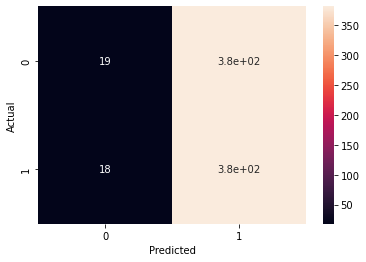

0.5012531328320803
Accuracy for the fold no. 225634 on the test set: 0.0027048270760125764
Accuracy for the fold no. 225635 on the test set: 0.002103754392454226
Accuracy for the fold no. 225636 on the test set: 0.002149990752727945
Accuracy for the fold no. 225637 on the test set: 0.002126872572591086
Accuracy for the fold no. 225638 on the test set: 0.032527279452561494
              precision    recall  f1-score   support

         0.0       0.39      0.03      0.05      1644
       1e+00       0.50      0.96      0.65      1644

    accuracy                           0.49      3288
   macro avg       0.45      0.49      0.35      3288
weighted avg       0.45      0.49      0.35      3288



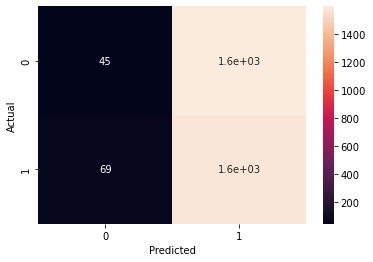

0.4927007299270073
Accuracy for the fold no. 225639 on the test set: 0.0022055697278911563
Accuracy for the fold no. 225640 on the test set: 0.002152423469387755
Accuracy for the fold no. 225641 on the test set: 0.0024182190215513806
Accuracy for the fold no. 225642 on the test set: 0.002099332996731418
Accuracy for the fold no. 225643 on the test set: 0.044564321968589726
              precision    recall  f1-score   support

         0.0       0.43      0.03      0.05      1414
       1e+00       0.50      0.96      0.66      1414

    accuracy                           0.50      2828
   macro avg       0.46      0.50      0.35      2828
weighted avg       0.46      0.50      0.35      2828



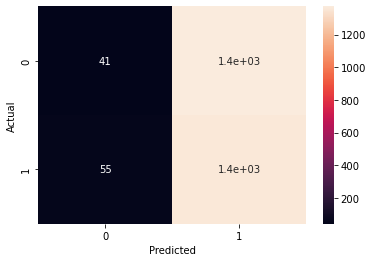

0.49504950495049505


In [39]:
#ALL FEATURES -----------------SPLIT-------------------SVC
kf = KFold(n_splits=3, shuffle=False)

dfs = [df_jinek, df_vt, df_inf]
    
for train_index, test_index in kf.split(dfs):
    train = dfs[train_index[0]].append(dfs[train_index[1]], ignore_index=True)
    test = dfs[test_index[0]][dfs[test_index[0]]["label"] != -1]
    
    X_train = train[columns[:-1]]# + dfs[train_index[1]][columns[:-1]]
    X_test = test[columns[:-1]]
    y_train = train["label"]
    y_test = test ['label']
        
#    model = xgb.XGBClassifier(objective="binary:logistic")
    model = GaussianNB()
#     model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                        probability=True, # Need to enable to be able to use predict_proba
#                        C=1.0, # default = 1.0
#                        max_iter = 1000,
#                        gamma='scale', # default = 'scale',
#                   )
    
    # Specify Self-Training model parameters
    self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                                 threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                                 criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                                 #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                                 max_iter=100, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                                 verbose=False # default=False, Verbosity prints some information after each iteration
                                                )

    # Fit the model
    #clf_ST = self_training_model.fit(X_train, y_train)
    # Fit the XGBoost model
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(X_train))

    for train_index, test_index in kf5.split(rn):
        X_train_cv = X_train.iloc[train_index]#.reset_index(drop=True))
        y_train_cv = y_train.iloc[train_index]#pd.concat([df_train.iloc[train_index][columns[-1]].reset_index(drop=True), 
                     #        df_unlabeled.iloc[split[i-1][0]][columns[-1]]])#.reset_index(drop=True))
        X_val = X_train.iloc[test_index]#pd.concat([df_train.iloc[test_index][columns[:-1]].reset_index(drop=True), 
                #           df_unlabeled.iloc[split[i-1][1]][columns[:-1]]])#.reset_index(drop=True))
        y_val = y_train.iloc[test_index]#pd.concat([df_train.iloc[test_index][columns[-1]].reset_index(drop=True), 
                #           df_unlabeled.iloc[split[i-1][1]][columns[-1]]])#.reset_index(drop=True))

    #     if X_train.size > 0 & y_train.size > 0:
        self_training_model.fit(X_train_cv,y_train_cv)

        print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
    #     else:
    #         print(X_train.size)
    #         print(y_train.size)
    #         print(X_test.size)
    #         print(y_test.size)
    #         print("----------")
        i += 1






    #accuracy, precision, recall, F1-score
    print(classification_report(y_test, self_training_model.predict(X_test)))
    #confusion matrix
    cm = confusion_matrix(y_test, self_training_model.predict(X_test))
    sn.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    #AUC
    #print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
    print(roc_auc_score(y_test, self_training_model.predict(X_test)))

    # from sklearn.model_selection import cross_val_score
    # scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

In [45]:
context_columns = ["followers_count",
          "tweet_count",
#           "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
#           "exclamation_marks",
#           "capital letters",
          "retweet_count",
#           "hashtags",
          "following",
#           "text length",
          "listed_count",
#           "emoticons",
          "like_count",
          "time_after_posting",
          "activity",
          "label"]

content_columns = [#"followers_count",
          #"tweet_count",
          "question_marks",
          #"verified",
          #"accountlife",
          #"followers_ratio",
          "exclamation_marks",
          "capital letters",
          #"retweet_count",
          "hashtags",
          #"following",
          "text length",
          #"listed_count",
          "emoticons",
          #"like_count",
          #"time_after_posting",
          #"activity",
          "label"]

In [46]:
features = get_features(data)
dfcontext = pd.DataFrame(data=[[x[0], x[1], x[3], x[4], x[5], x[8], x[10], x[12], x[14], x[15], x[16], x[17]] for x in features], index=None, columns=context_columns)
dfcontent = pd.DataFrame(data=[[x[2], x[6], x[7], x[9], x[11], x[13], x[17]] for x in features], index=None, columns=content_columns)

In [ ]:
#CONTEXT -------------------- SELF TRAINING ------------- XGBOOST
df_labeled=dfcontext[dfcontext["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[context_columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
#model = GaussianNB()
model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 100000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][context_columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][context_columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][context_columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][context_columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][context_columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][context_columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][context_columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][context_columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

Accuracy for the fold no. 1 on the test set: 0.0054497731114867875
Accuracy for the fold no. 2 on the test set: 0.008808612865913338
Accuracy for the fold no. 3 on the test set: 0.0053164275386497605
Accuracy for the fold no. 4 on the test set: 0.005605605605605605
Accuracy for the fold no. 5 on the test set: 0.006028384570894692
              precision    recall  f1-score   support

           0       0.55      0.06      0.11       469
           1       0.43      0.93      0.59       353

    accuracy                           0.44       822
   macro avg       0.49      0.50      0.35       822
weighted avg       0.49      0.44      0.32       822



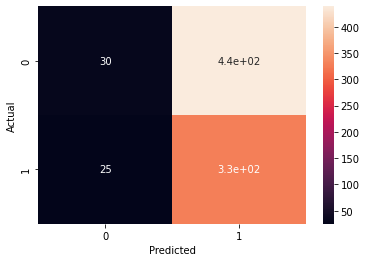

0.49657217755818234


In [49]:
#CONTEXT -------------------- SELF TRAINING ------------- SVC
df_labeled=dfcontext[dfcontext["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[context_columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
#model = GaussianNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
                        probability=True, # Need to enable to be able to use predict_proba
                        C=1.0, # default = 1.0
                        max_iter = 100000,
                        gamma='scale', # default = 'scale',
                   )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][context_columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][context_columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][context_columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][context_columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][context_columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][context_columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][context_columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][context_columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

Accuracy for the fold no. 1 on the test set: 0.0066509475932022425
Accuracy for the fold no. 2 on the test set: 0.006139336239878993
Accuracy for the fold no. 3 on the test set: 0.006450895339784228
Accuracy for the fold no. 4 on the test set: 0.00667334000667334
Accuracy for the fold no. 5 on the test set: 0.006451038839702807
              precision    recall  f1-score   support

           0       0.59      0.11      0.18       502
           1       0.39      0.88      0.54       320

    accuracy                           0.41       822
   macro avg       0.49      0.49      0.36       822
weighted avg       0.51      0.41      0.32       822



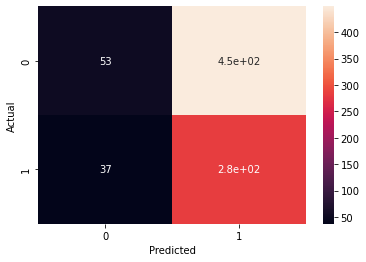

4.9497634462151396e-01


In [50]:
#CONTEXT -------------------- SELF TRAINING ------------- NAIVE BAYES
df_labeled=dfcontext[dfcontext["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[context_columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = GaussianNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 100000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][context_columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][context_columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][context_columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][context_columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][context_columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][context_columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][context_columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][context_columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

In [47]:
#CONTENT -------------------- SELF TRAINING ------------- XGBOOST
df_labeled=dfcontent[dfcontent["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[content_columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
#model = GaussianNB()
model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 100000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][content_columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][content_columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][content_columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][content_columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][content_columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][content_columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][content_columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][content_columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

Accuracy for the fold no. 1 on the test set: 0.011856037013969214
Accuracy for the fold no. 2 on the test set: 0.011967256873387313
Accuracy for the fold no. 3 on the test set: 0.011989767545323101


KeyboardInterrupt: 

In [ ]:
#CONTENT -------------------- SELF TRAINING ------------- SVC
df_labeled=dfcontent[dfcontent["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[content_columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
#model = GaussianNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
                        probability=True, # Need to enable to be able to use predict_proba
                        C=1.0, # default = 1.0
                        max_iter = 100000,
                        gamma='scale', # default = 'scale',
                   )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][content_columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][content_columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][content_columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][content_columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][content_columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][content_columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][content_columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][content_columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)

In [ ]:
#CONTENT -------------------- SELF TRAINING ------------- NAIVE BAYES
df_labeled=dfcontent[dfcontent["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)

df_unlabeled = df[df["label"]==-1].reset_index(drop=True)
#df_train = df_train.append(df_unlabeled)

df_train.reset_index(drop=True)

# X_baseline=df_train[columns[:-1]]
# y_baseline=df_train['label'].values

# Put test data into an array
X_test=df_test[content_columns[:-1]].reset_index(drop=True)
y_test=df_test['label'].reset_index(drop=True).values


########## Step 2 - Model Fitting ########## 
# Specify SVC model parameters
model = GaussianNB()
#model = xgb.XGBClassifier(objective="binary:logistic")
# model = model = SVC(kernel='linear', #'rbf' for 'normal' SVC
#                         probability=True, # Need to enable to be able to use predict_proba
#                         C=1.0, # default = 1.0
#                         max_iter = 100000,
#                         gamma='scale', # default = 'scale',
#                    )

# Specify Self-Training model parameters
self_training_model = SelfTrainingClassifier(base_estimator=model, # An estimator object implementing fit and predict_proba.
                                             threshold=0.7, # default=0.75, The decision threshold for use with criterion='threshold'. Should be in [0, 1).
                                             criterion='threshold', # {‘threshold’, ‘k_best’}, default=’threshold’, The selection criterion used to select which labels to add to the training set. If 'threshold', pseudo-labels with prediction probabilities above threshold are added to the dataset. If 'k_best', the k_best pseudo-labels with highest prediction probabilities are added to the dataset.
                                             #k_best=50, # default=10, The amount of samples to add in each iteration. Only used when criterion='k_best'.
                                             max_iter=1000, # default=10, Maximum number of iterations allowed. Should be greater than or equal to 0. If it is None, the classifier will continue to predict labels until no new pseudo-labels are added, or all unlabeled samples have been labeled.
                                             verbose=False # default=False, Verbosity prints some information after each iteration
                                            )

# Fit the model
#clf_ST = self_training_model.fit(X_train, y_train)
# Fit the XGBoost model
#clf_ST = self_training_model.fit(X_baseline, y_baseline)
kf5 = KFold(n_splits=5, shuffle=False)
rn1 = range(1,len(df_unlabeled))
split = []
for i,j in kf5.split(rn1):
    split.append([i,j])
rn2 = range(1,len(df_train))
i = 1
for train_index, test_index in kf5.split(rn2):
    X_train = pd.concat([df_train.iloc[train_index][content_columns[:-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][content_columns[:-1]]])#.reset_index(drop=True))
    y_train = pd.concat([df_train.iloc[train_index][content_columns[-1]].reset_index(drop=True), 
                         df_unlabeled.iloc[split[i-1][0]][content_columns[-1]]])#.reset_index(drop=True))
    X_val = pd.concat([df_train.iloc[test_index][content_columns[:-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][content_columns[:-1]]])#.reset_index(drop=True))
    y_val = pd.concat([df_train.iloc[test_index][content_columns[-1]].reset_index(drop=True), 
                       df_unlabeled.iloc[split[i-1][1]][content_columns[-1]]])#.reset_index(drop=True))

#     if X_train.size > 0 & y_train.size > 0:
    self_training_model.fit(X_train,y_train)
    
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_val, self_training_model.predict(X_val))}")
#     else:
#         print(X_train.size)
#         print(y_train.size)
#         print(X_test.size)
#         print(y_test.size)
#         print("----------")
    i += 1
    





#accuracy, precision, recall, F1-score
print(classification_report(y_test, self_training_model.predict(X_test)))
#confusion matrix
cm = confusion_matrix(y_test, self_training_model.predict(X_test))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#AUC
#print(roc_auc_score(y_baseline, clf_ST.predict(X_baseline.values)))
print(roc_auc_score(y_test, self_training_model.predict(X_test)))

# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(self_training_model, X_test, y_test, cv=7)